# Wafa Mohbubul - 190418551

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics

df = pd.read_csv("datafile.csv")
df.head()

,Event,mu_E,mu_Px,mu_Py,mu_Pz,B1_E,B1_Px,B1_Py,B1_Pz,B2_E,...,J1_Py,J1_Pz,J2_E,J2_Px,J2_Py,J2_Pz,J3_E,J3_Px,J3_Py,J3_Pz
0,0,51268.2,23427.4,-30694.4,33725.70,144539.0,30556.9,-124646.0,66221.10,41345.7,...,83141.7,100690.0,153528.0,24049.1,36265.6,-147189.0,62572.0,-33733.80,-15020.8,-50334.600
1,8,62607.2,-55928.2,-27403.4,-6382.09,143720.0,-90881.3,80127.7,-76677.30,63423.3,...,44228.2,104774.0,49101.6,37159.0,-12960.1,-28853.1,31804.9,-28743.60,11803.6,-203.991
2,41,175318.0,110076.0,-128700.0,45341.20,209660.0,-110486.0,118174.0,-132929.00,54280.7,...,35725.8,-14619.2,82184.9,32212.0,13286.3,-73960.8,68410.5,8936.84,32453.5,59377.200
3,44,125126.0,32677.8,102847.0,63335.10,75826.2,-60117.0,-44410.6,1588.44,78404.3,...,62414.2,-24681.6,85371.5,-40072.9,-22510.0,71706.7,112722.0,19212.20,-19288.7,-109245.000
4,52,81170.1,45960.6,-38977.6,-54377.80,209614.0,-41145.2,31890.1,-202909.00,126913.0,...,62056.2,-110476.0,168499.0,14308.5,42066.1,-162219.0,55170.7,9476.58,-26691.3,46793.300


In [2]:
print(df.columns)

Index(['Event', ' mu_E', ' mu_Px', ' mu_Py', ' mu_Pz', ' B1_E', ' B1_Px',
       ' B1_Py', ' B1_Pz', ' B2_E', ' B2_Px', ' B2_Py', ' B2_Pz', ' J1_E',
       ' J1_Px', ' J1_Py', ' J1_Pz', ' J2_E', ' J2_Px', ' J2_Py', ' J2_Pz',
       ' J3_E', ' J3_Px', ' J3_Py', ' J3_Pz'],
      dtype='object')


In [3]:
# functions that calculates the mass of 2 not B-tagged jets

def M12(row):
    E = np.square(row[' J1_E'] + row[' J2_E'])
    x = np.square(row[' J1_Px'] + row[' J2_Px'])
    y = np.square(row[' J1_Py'] + row[' J2_Py'])
    z = np.square(row[' J1_Pz'] + row[' J2_Pz'])
    return np.sqrt(E - x - y - z)/ 1000

def M13(row):
    E = np.square(row[' J1_E'] + row[' J3_E'])
    x = np.square(row[' J1_Px'] + row[' J3_Px'])
    y = np.square(row[' J1_Py'] + row[' J3_Py'])
    z = np.square(row[' J1_Pz'] + row[' J3_Pz'])
    return np.sqrt(E - x - y - z)/1000

def M23(row):
    E = np.square(row[' J2_E'] + row[' J3_E'])
    x = np.square(row[' J2_Px'] + row[' J3_Px'])
    y = np.square(row[' J2_Py'] + row[' J3_Py'])
    z = np.square(row[' J2_Pz'] + row[' J3_Pz'])
    return np.sqrt(E - x - y - z)/1000

In [4]:
df['M12'] = df.apply(M12, axis=1)
df['M13'] = df.apply(M13, axis=1)
df['M23'] = df.apply(M23, axis=1)

df.head()

,Event,mu_E,mu_Px,mu_Py,mu_Pz,B1_E,B1_Px,B1_Py,B1_Pz,B2_E,...,J2_Px,J2_Py,J2_Pz,J3_E,J3_Px,J3_Py,J3_Pz,M12,M13,M23
0,0,51268.2,23427.4,-30694.4,33725.70,144539.0,30556.9,-124646.0,66221.10,41345.7,...,24049.1,36265.6,-147189.0,62572.0,-33733.80,-15020.8,-50334.600,252.916238,169.926817,84.489659
1,8,62607.2,-55928.2,-27403.4,-6382.09,143720.0,-90881.3,80127.7,-76677.30,63423.3,...,37159.0,-12960.1,-28853.1,31804.9,-28743.60,11803.6,-203.991,123.034830,147.083750,75.029266
2,41,175318.0,110076.0,-128700.0,45341.20,209660.0,-110486.0,118174.0,-132929.00,54280.7,...,32212.0,13286.3,-73960.8,68410.5,8936.84,32453.5,59377.200,67.561152,72.861829,136.678223
3,44,125126.0,32677.8,102847.0,63335.10,75826.2,-60117.0,-44410.6,1588.44,78404.3,...,-40072.9,-22510.0,71706.7,112722.0,19212.20,-19288.7,-109245.000,131.115306,114.612161,188.811045
4,52,81170.1,45960.6,-38977.6,-54377.80,209614.0,-41145.2,31890.1,-202909.00,126913.0,...,14308.5,42066.1,-162219.0,55170.7,9476.58,-26691.3,46793.300,42.664755,165.862763,189.480680


(20.0, 150.0)

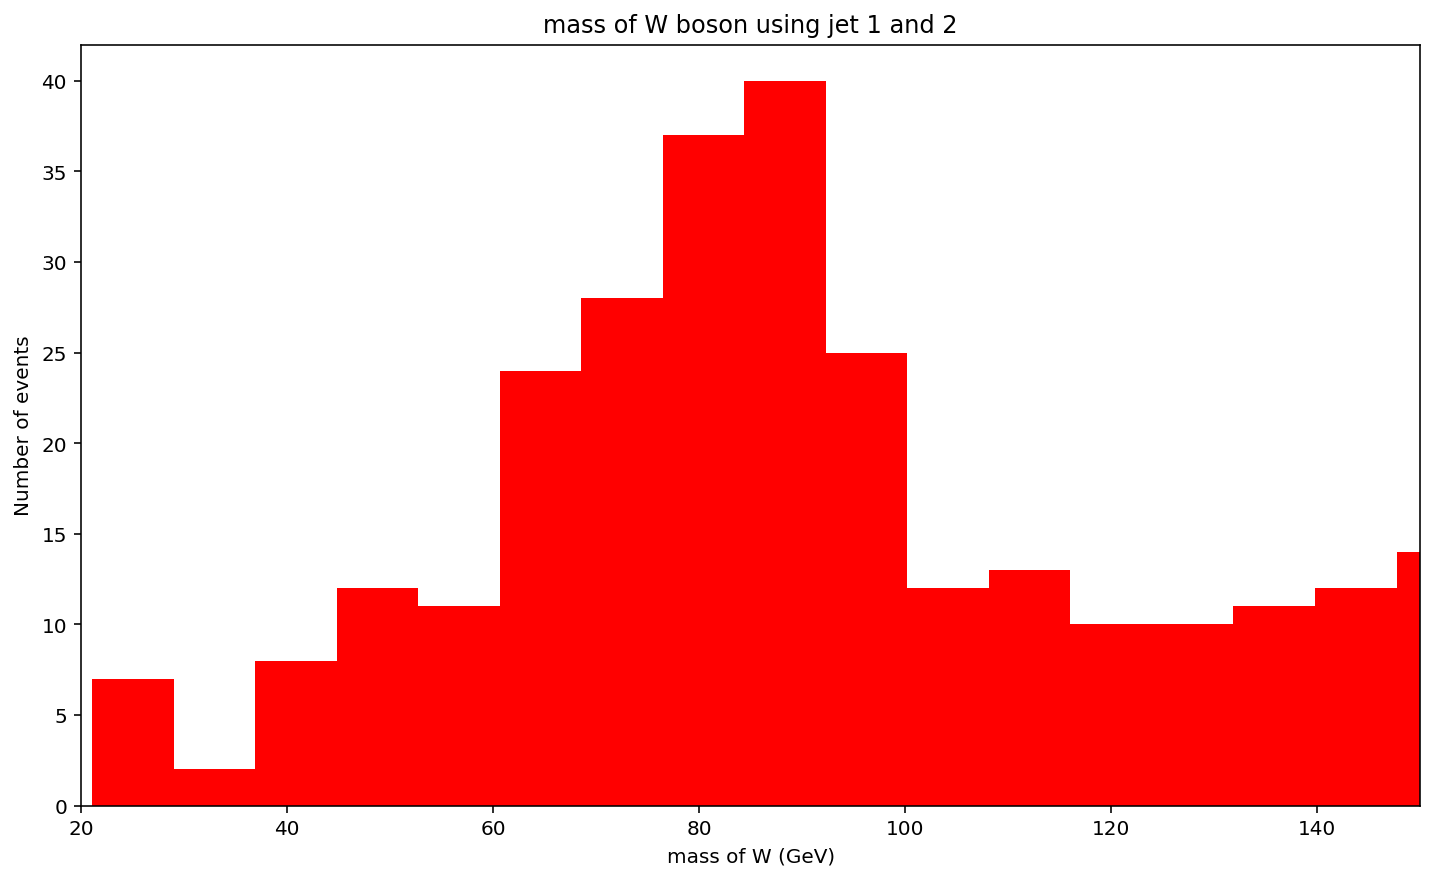

In [5]:
plt.hist(df["M12"], bins=200, label="mass of W (GeV)", color='red') 
plt.xlabel("mass of W (GeV)")
plt.ylabel("Number of events")
plt.title("mass of W boson using jet 1 and 2")
plt.xlim(20, 150)

(20.0, 150.0)

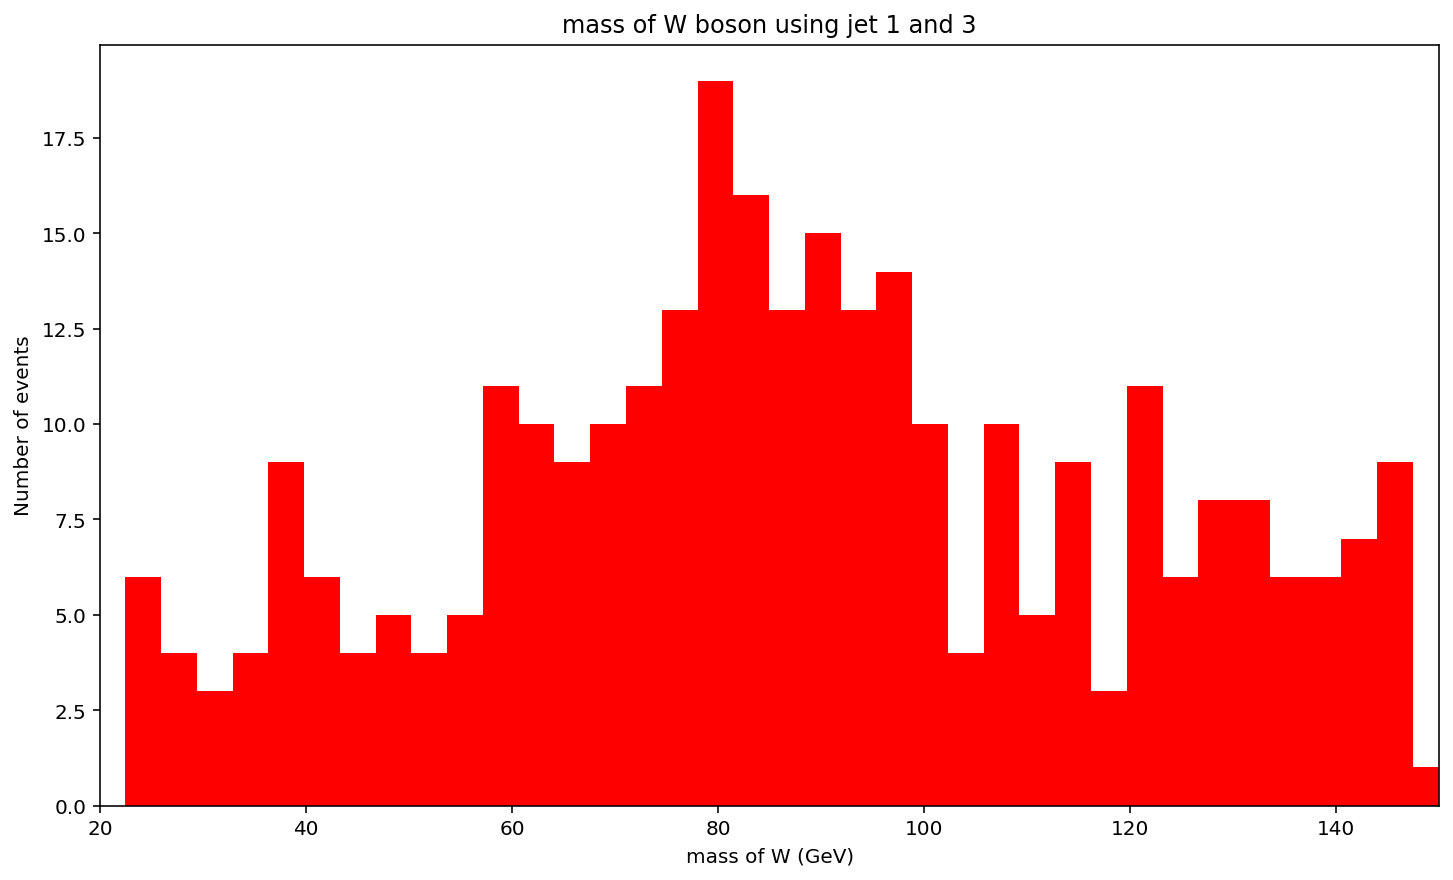

In [6]:
plt.hist(df["M13"], bins=200, label="mass of W (GeV)", color='red') 
plt.xlabel("mass of W (GeV)")
plt.ylabel("Number of events")
plt.title("mass of W boson using jet 1 and 3")
plt.xlim(20, 150)

(20.0, 150.0)

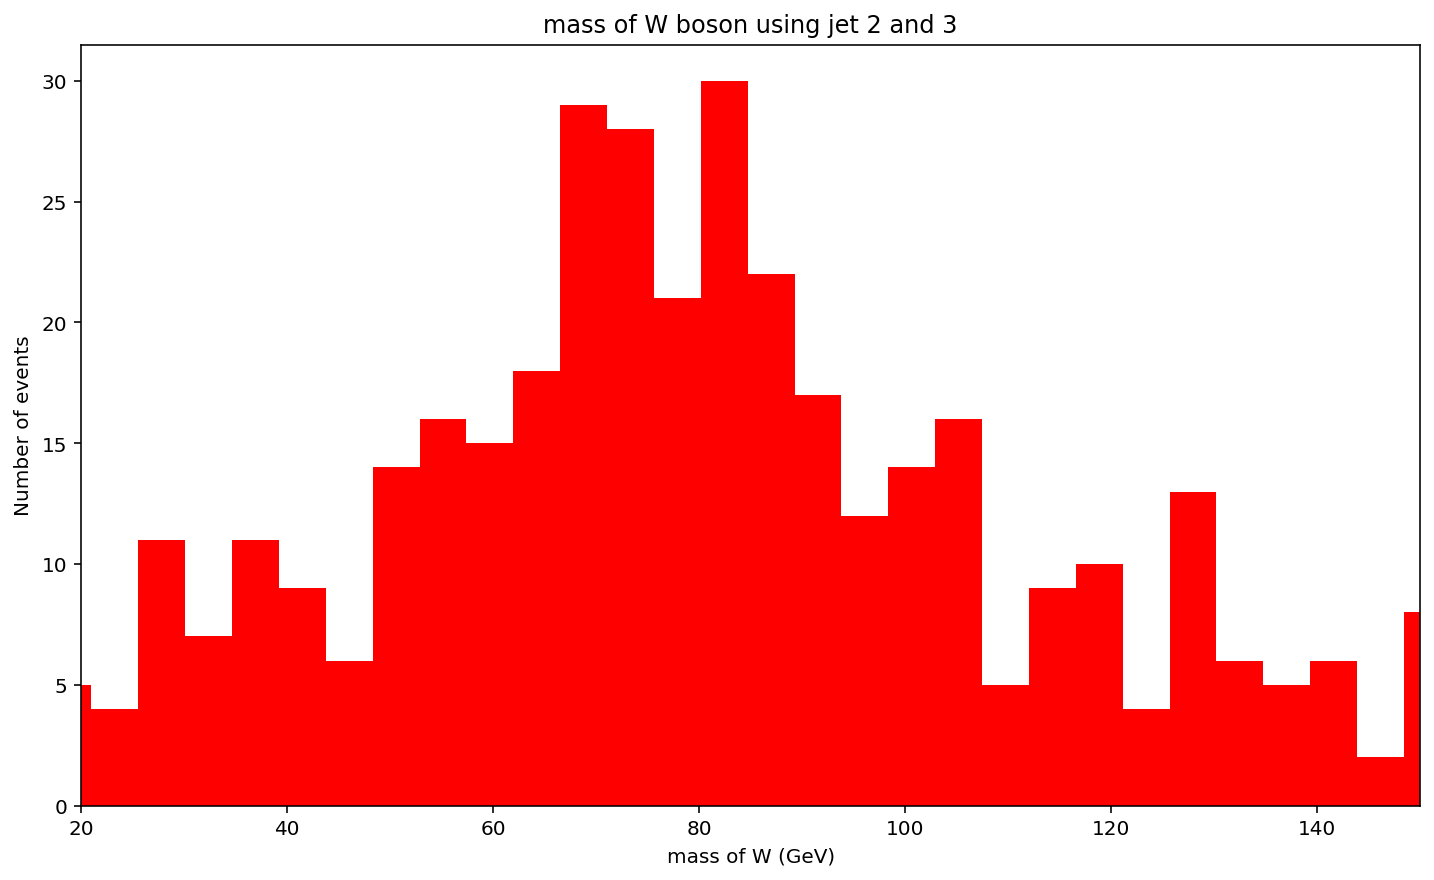

In [7]:
plt.hist(df["M23"], bins=200, label="mass of W (GeV)", color='red') 
plt.xlabel("mass of W (GeV)")
plt.ylabel("Number of events")
plt.title("mass of W boson using jet 2 and 3")
plt.xlim(20, 150)

In [8]:
print("Mean of W boson with J1J2 = ", round(np.mean(df["M12"]), 2), "GeV")
print("Mean of W boson with J1J3 ", round(np.mean(df["M13"]), 2), "GeV")
print("Mean of W boson with J2J3 ", round(np.mean(df["M23"]), 2), "GeV")

Mean of W boson with J1J2 =  180.15 GeV
Mean of W boson with J1J3  144.35 GeV
Mean of W boson with J2J3  111.99 GeV


In [9]:
top_quark_mass = []

for index, row in df.iterrows():
    # Get the values from the specified columns
    m12 = row["M12"]
    m13 = row["M13"]
    m23 = row["M23"]

    # Find the value closest to 80
    closest_value = min((m12, m13, m23), key=lambda x: abs(x - 80))

    if closest_value == m12:
        B1J1J2 = np.sqrt((row[" B1_E"]+row[" J1_E"]+row[" J2_E"])**2 - 
                         (row[" B1_Px"]+row[" J1_Px"]+row[" J2_Px"])**2 - 
                         (row[" B1_Py"]+row[" J1_Py"]+row[" J2_Py"])**2 - 
                         (row[" B1_Pz"]+row[" J1_Pz"]+row[" J2_Pz"])**2)/1000
        B2J1J2 = np.sqrt((row[" B2_E"]+row[" J1_E"]+row[" J2_E"])**2 - 
                         (row[" B2_Px"]+row[" J1_Px"]+row[" J2_Px"])**2 - 
                         (row[" B2_Py"]+row[" J1_Py"]+row[" J2_Py"])**2 - 
                         (row[" B2_Pz"]+row[" J1_Pz"]+row[" J2_Pz"])**2)/1000
        # Check which value is less than 250 and print it
        if B1J1J2 < 250 and B1J1J2 < B2J1J2:
            top_quark_mass.append(B1J1J2)
        elif B2J1J2 < 250:
            top_quark_mass.append(B2J1J2)
            
            
    elif closest_value == m13:
        B1J1J3 = np.sqrt((row[" B1_E"]+row[" J1_E"]+row[" J3_E"])**2 - 
                         (row[" B1_Px"]+row[" J1_Px"]+row[" J3_Px"])**2 - 
                         (row[" B1_Py"]+row[" J1_Py"]+row[" J3_Py"])**2 - 
                         (row[" B1_Pz"]+row[" J1_Pz"]+row[" J3_Pz"])**2)/1000
        B2J1J3 = np.sqrt((row[" B2_E"]+row[" J1_E"]+row[" J3_E"])**2 - 
                         (row[" B2_Px"]+row[" J1_Px"]+row[" J3_Px"])**2 - 
                         (row[" B2_Py"]+row[" J1_Py"]+row[" J3_Py"])**2 - 
                         (row[" B2_Pz"]+row[" J1_Pz"]+row[" J3_Pz"])**2)/1000
        # Check which value is less than 250 and print it
        if B1J1J3 < 250 and B1J1J3 < B2J1J3:
            top_quark_mass.append(B1J1J3)
        elif B2J1J3 < 250:
            top_quark_mass.append(B2J1J3)
            
    else:
        B1J2J3 = np.sqrt((row[" B1_E"]+row[" J2_E"]+row[" J3_E"])**2 - 
                         (row[" B1_Px"]+row[" J2_Px"]+row[" J3_Px"])**2 - 
                         (row[" B1_Py"]+row[" J2_Py"]+row[" J3_Py"])**2 - 
                         (row[" B1_Pz"]+row[" J2_Pz"]+row[" J3_Pz"])**2)/1000
        B2J2J3 = np.sqrt((row[" B2_E"]+row[" J2_E"]+row[" J3_E"])**2 - 
                         (row[" B2_Px"]+row[" J2_Px"]+row[" J3_Px"])**2 - 
                         (row[" B2_Py"]+row[" J2_Py"]+row[" J3_Py"])**2 - 
                         (row[" B2_Pz"]+row[" J2_Pz"]+row[" J3_Pz"])**2)/1000
        # Check which value is less than 250 and print it
        if B1J2J3 < 250 and B1J2J3 < B2J2J3:
            top_quark_mass.append(B1J2J3)
        elif B2J2J3 < 250:
            top_quark_mass.append(B2J2J3)

In [10]:
np.mean(top_quark_mass)

157.3574318317983

In [11]:
# Uncertainty 

# Calculate the standard deviation
std_dev = statistics.stdev(top_quark_mass)

print(f"Standard deviation: {std_dev:.2f}")


Standard deviation: 31.39


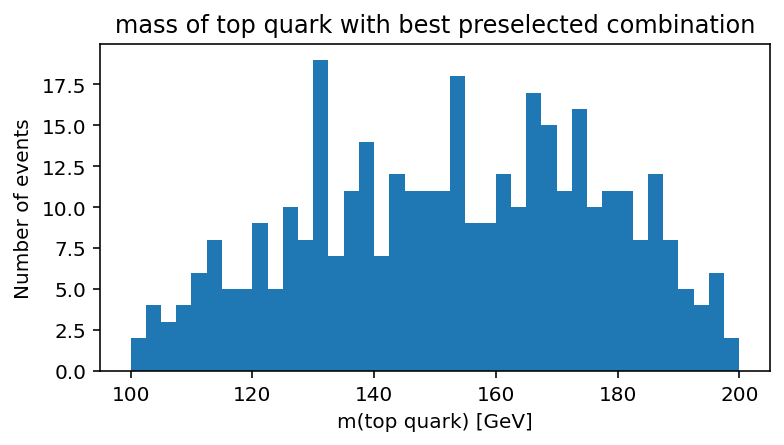

In [12]:
fig = plt.figure(figsize=(6, 3))
plt.hist(top_quark_mass, bins=40, range=(100, 200), label="m(W) [GeV]") 
plt.xlabel("m(top quark) [GeV]")
plt.ylabel("Number of events")
plt.title("mass of top quark with best preselected combination")
plt.show()